In [3]:
#import necessary libraries
import pandas as pd
import seaborn as sb
import numpy as np

In [4]:
#Read dataset with the help of pandas and saved it in a varaible named as 'data'
data = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\archive\seattle-weather.csv")

In [5]:
#classification type problem
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


# preprocessing

In [6]:
#represents the information of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [7]:
#from obj to datetime
date_col = pd.DatetimeIndex(data['date'])
data['year'] = date_col.year
data['month'] = date_col.month
data['day'] = date_col.day

In [8]:
data

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5
...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2015,12,27
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,2015,12,28
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,2015,12,29
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,2015,12,30


In [9]:
data.drop(columns=['date'],axis=1,inplace=True)

In [10]:
data

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,10.9,10.6,2.8,4.5,rain,2012,1,2
2,0.8,11.7,7.2,2.3,rain,2012,1,3
3,20.3,12.2,5.6,4.7,rain,2012,1,4
4,1.3,8.9,2.8,6.1,rain,2012,1,5
...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain,2015,12,27
1457,1.5,5.0,1.7,1.3,rain,2015,12,28
1458,0.0,7.2,0.6,2.6,fog,2015,12,29
1459,0.0,5.6,-1.0,3.4,sun,2015,12,30


In [11]:
#represents number of columns(6) and rows(1461)
data.shape

(1461, 8)

In [12]:
#will show any 4 random samples
data.sample(4)

,precipitation,temp_max,temp_min,wind,weather,year,month,day
955,21.6,23.3,15.0,2.7,rain,2014,8,13
1149,0.0,12.8,0.6,1.4,sun,2015,2,23
513,0.5,17.2,11.7,2.8,rain,2013,5,28
966,0.0,25.0,13.3,2.3,sun,2014,8,24


In [13]:
#for checking whether there is any null value in our dataset
data.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
year             0
month            0
day              0
dtype: int64

In [14]:
#represents unique categories of weather given in column
#(or)data.weather.nunique() --represents the total number of unique categories
data.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [15]:
for i in data:
    print(i,end=' : ')
    print(data[i].nunique())

precipitation : 111
temp_max : 67
temp_min : 55
wind : 79
weather : 5
year : 4
month : 12
day : 31


In [16]:
data.weather.value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

Exploratory Data Analysis(EDA)

In [17]:
'''import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport'''

'import numpy as np\nimport pandas as pd\nfrom ydata_profiling import ProfileReport'

In [18]:
'''prof = ProfileReport(data)
prof.to_file(output_file='analysis.html')'''

"prof = ProfileReport(data)\nprof.to_file(output_file='analysis.html')"

<Axes: xlabel='weather', ylabel='precipitation'>

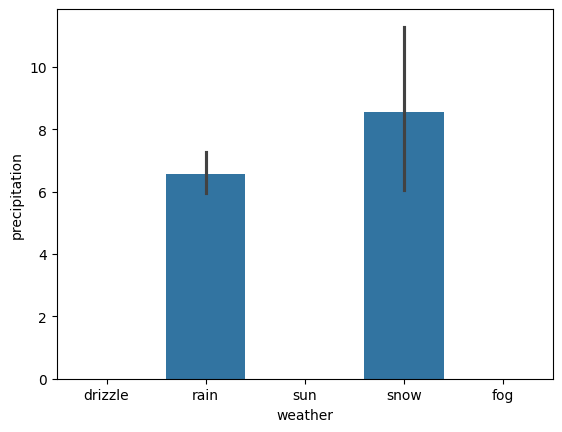

In [19]:
sb.barplot(data=data,x='weather',y='precipitation')

<Axes: xlabel='temp_max', ylabel='temp_min'>

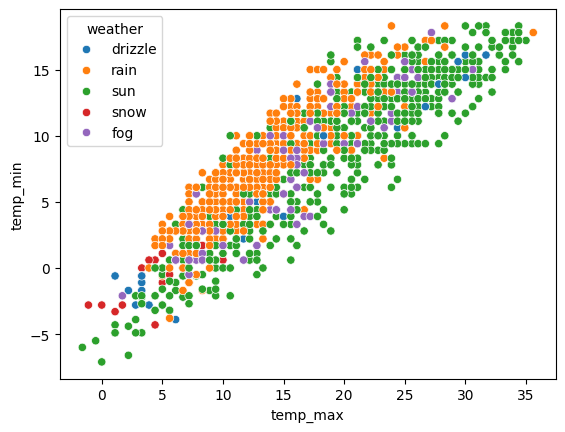

In [20]:
sb.scatterplot(data=data,x='temp_max',y='temp_min',hue='weather')

In [40]:
ytest

array([2, 4, 2, 2, 4, 2, 0, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 1, 4, 4,
       4, 4, 2, 2, 2, 3, 1, 4, 2, 2, 4, 4, 2, 4, 1, 2, 2, 4, 2, 2, 3, 4,
       2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 0, 0, 2, 4, 2, 2,
       4, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       1, 2, 2, 2, 4, 2, 0, 4, 2, 0, 2, 2, 2, 4, 1, 2, 2, 2, 4, 2, 2, 1,
       4, 2, 4, 2, 2, 2, 4, 1, 4, 1, 4, 2, 2, 4, 2, 2, 1, 1, 2, 4, 2, 4,
       2, 1, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 1, 2, 2, 2, 4, 1, 2, 4,
       4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 1, 4, 2, 3, 4, 4, 4, 2, 4,
       2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 4, 1, 2, 2,
       4, 1, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2,
       2, 4, 2, 4, 4, 2, 2, 1, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4,
       4, 2, 2, 4, 1, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 1, 4, 4, 3, 0, 2,
       2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 0, 2, 2, 3, 2, 2, 4, 4, 2, 4,
       0, 4, 4, 4, 2, 4, 0])

In [21]:
for i in data:
    print(i,end=' : ')
    print(data[i].nunique())
    

precipitation : 111
temp_max : 67
temp_min : 55
wind : 79
weather : 5
year : 4
month : 12
day : 31


In [22]:
#feature engineering

In [23]:
#train-test-split

In [24]:
x = data.drop('weather',axis=1) #train
y= data[['weather']]  #test

In [25]:
x

,precipitation,temp_max,temp_min,wind,year,month,day
0,0.0,12.8,5.0,4.7,2012,1,1
1,10.9,10.6,2.8,4.5,2012,1,2
2,0.8,11.7,7.2,2.3,2012,1,3
3,20.3,12.2,5.6,4.7,2012,1,4
4,1.3,8.9,2.8,6.1,2012,1,5
...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2015,12,27
1457,1.5,5.0,1.7,1.3,2015,12,28
1458,0.0,7.2,0.6,2.6,2015,12,29
1459,0.0,5.6,-1.0,3.4,2015,12,30


In [26]:
y

,weather
0,drizzle
1,rain
2,rain
3,rain
4,rain
...,...
1456,rain
1457,rain
1458,fog
1459,sun


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8)

In [29]:
xtrain

,precipitation,temp_max,temp_min,wind,year,month,day
617,0.0,26.1,13.9,2.1,2013,9,9
1406,12.7,12.2,9.4,3.0,2015,11,7
322,7.9,10.0,6.1,4.9,2012,11,18
682,0.0,13.9,10.6,3.8,2013,11,13
906,0.0,26.1,13.9,2.4,2014,6,25
...,...,...,...,...,...,...,...
652,0.0,15.6,3.9,1.6,2013,10,14
954,12.7,27.2,17.2,3.1,2014,8,12
808,0.5,11.1,3.3,5.1,2014,3,19
948,0.0,26.1,15.0,2.2,2014,8,6


In [30]:
ytrain

,weather
617,sun
1406,rain
322,rain
682,sun
906,sun
...,...
652,sun
954,rain
808,rain
948,fog


In [31]:
from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [32]:
#one_hot encoding
#trf1 = ColumnTransformer([('ohe',OneHotEncoder(handle_unknown = 'ignore',sparse_output = False),[4])]
 #                       ,remainder = 'passthrough')

In [33]:
#trf1

In [34]:
le = LabelEncoder()

In [35]:
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [34]:
#label encoding
#trf0 = ColumnTransformer([('le',LabelEncoder(),[0])])

In [35]:
#trf0

In [36]:
# Scaling
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,6))])

In [37]:
trf2

ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 6, None))])

In [38]:
# train the model
#trf3 = DecisionTreeClassifier()

In [39]:
#trf3

In [40]:
#logistic classifier
trf4 = LogisticRegression()

In [41]:
trf4

LogisticRegression()

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
trf5 = RandomForestClassifier()

In [44]:
trf5

RandomForestClassifier()

In [45]:
pipe = make_pipeline(trf2,trf5)

In [46]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 6, None))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [47]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 6, None))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [48]:
# Predict
y_pred = pipe.predict(xtest)

In [49]:
y_pred

array([2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 1, 4, 4, 2, 4, 4, 4, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 1,
       2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 0, 2, 2, 4, 4, 4, 2, 4, 4, 4, 1,
       4, 2, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 1, 4, 4, 4, 4, 2, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 1, 4, 4, 2, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 2, 3, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4,
       2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2,
       1, 4, 2, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2,
       4, 4, 2, 4, 2, 0, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 1, 0, 2, 4,
       4, 2, 4, 2, 4, 3, 2, 2, 4, 4, 2, 2, 0, 4, 4, 4, 4, 2, 4, 2, 4, 2,
       4, 4, 2, 2, 4, 2, 1, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2,
       4, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       4, 2, 4, 0, 4, 4, 4, 2, 0, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 2, 4, 2, 2, 2, 2])

In [50]:
ytest

array([2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 4, 1, 4, 2, 4, 4, 4, 2,
       1, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 0, 2, 2, 0, 4, 1,
       2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 1, 4, 4, 2, 4, 1, 4, 1,
       1, 2, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 1, 4, 4, 1, 4, 2, 2, 2, 2, 1,
       3, 2, 4, 4, 2, 4, 1, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2, 0, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 2, 3, 4, 3, 2, 2, 2, 4, 4, 0, 2, 2, 2, 2, 4, 2, 4,
       2, 2, 2, 4, 4, 2, 2, 0, 2, 2, 2, 2, 4, 4, 4, 2, 4, 1, 4, 4, 4, 2,
       1, 4, 2, 2, 4, 4, 4, 2, 4, 2, 4, 1, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2,
       0, 4, 2, 0, 2, 4, 4, 4, 4, 4, 1, 4, 2, 4, 4, 0, 2, 2, 1, 4, 2, 0,
       4, 2, 0, 2, 4, 3, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 3, 4, 2,
       4, 4, 2, 2, 1, 2, 1, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 3, 2, 2, 2,
       4, 4, 4, 4, 2, 2, 1, 2, 1, 2, 1, 4, 2, 1, 2, 2, 2, 2, 4, 4, 2, 1,
       4, 2, 0, 4, 4, 1, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 2, 4, 2, 2, 2, 2])

In [51]:
ytest.shape,y_pred.shape

((293,), (293,))

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred)

0.8430034129692833

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(ytest,y_pred)

array([[  0,   0,   0,   0,  11],
       [  0,   6,   0,   0,  18],
       [  0,   0, 118,   0,   3],
       [  0,   0,   4,   2,   0],
       [  6,   2,   2,   0, 121]], dtype=int64)

In [55]:
from sklearn.metrics import precision_score,recall_score,classification_report

In [56]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.75      0.25      0.38        24
           2       0.95      0.98      0.96       121
           3       1.00      0.33      0.50         6
           4       0.79      0.92      0.85       131

    accuracy                           0.84       293
   macro avg       0.70      0.50      0.54       293
weighted avg       0.83      0.84      0.82       293



In [59]:
import pickle

In [60]:
pickle.dump(pipe,open('predicting-weather.pkl','wb'))

In [61]:
f = open('predicting-weather.pkl','rb')

In [62]:
f1 = pickle.load(f)

In [63]:
pipe.predict([[0.8,	15.6,	6.7,	2.4,	2014	,10,	27]])

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([2])